### DataFrames

In [1]:
import pandas as pd
import numpy as np

In [2]:
pop2014 = pd.Series([100, 99.3,95.5,93.5,92.4,
                     84.8,84.5,78.9,74.3,72.8],
                   index=['Java', 'C','C++','Python','C#',
                          'PHP','Javascript','Ruby','R','Matlab'])



In [3]:
pop2015 = pd.Series({'Java':100, 'C':99.9,'C++':99.4,'Python':96.5,'C#':91.3,
                          'PHP':84.5,'Javascript':83.0,'Ruby':84.8,'R':76.2,'Matlab':72.4})

In [4]:
twoyears = pd.DataFrame({'2014':pop2014, '2015':pop2015})

twoyears

,2014,2015
C,99.3,99.9
C#,92.4,91.3
C++,95.5,99.4
Java,100.0,100.0
Javascript,84.5,83.0
Matlab,72.8,72.4
PHP,84.8,84.5
Python,93.5,96.5
R,74.3,76.2
Ruby,78.9,84.8


In [5]:
twoyears = twoyears.sort_values('2015',ascending=False)
twoyears

,2014,2015
Java,100.0,100.0
C,99.3,99.9
C++,95.5,99.4
Python,93.5,96.5
C#,92.4,91.3
Ruby,78.9,84.8
PHP,84.8,84.5
Javascript,84.5,83.0
R,74.3,76.2
Matlab,72.8,72.4


In [6]:
# extracting index values
twoyears.index

Index(['Java', 'C', 'C++', 'Python', 'C#', 'Ruby', 'PHP', 'Javascript', 'R',
       'Matlab'],
      dtype='object')

In [7]:
# extract column names
twoyears.columns

Index(['2014', '2015'], dtype='object')

In [8]:
# extract dataframe values
twoyears.values

array([[100. , 100. ],
       [ 99.3,  99.9],
       [ 95.5,  99.4],
       [ 93.5,  96.5],
       [ 92.4,  91.3],
       [ 78.9,  84.8],
       [ 84.8,  84.5],
       [ 84.5,  83. ],
       [ 74.3,  76.2],
       [ 72.8,  72.4]])

In [9]:
# extract specific column
twoyears['2014']

Java          100.0
C              99.3
C++            95.5
Python         93.5
C#             92.4
Ruby           78.9
PHP            84.8
Javascript     84.5
R              74.3
Matlab         72.8
Name: 2014, dtype: float64

###### extract subset of rows

In [10]:
# Numeric indices

twoyears.iloc[0:2]

,2014,2015
Java,100.0,100.0
C,99.3,99.9


In [11]:
# Explicit values
twoyears.loc['C':'Python']

,2014,2015
C,99.3,99.9
C++,95.5,99.4
Python,93.5,96.5


In [12]:
# Compute average language popularity

twoyears['Avg'] = 0.5*(twoyears['2014'] + twoyears['2015'])
twoyears

,2014,2015,Avg
Java,100.0,100.0,100.00
C,99.3,99.9,99.60
C++,95.5,99.4,97.45
Python,93.5,96.5,95.00
C#,92.4,91.3,91.85
Ruby,78.9,84.8,81.85
PHP,84.8,84.5,84.65
Javascript,84.5,83.0,83.75
R,74.3,76.2,75.25
Matlab,72.8,72.4,72.60


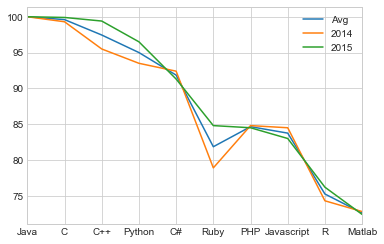

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')


twoyears['Avg'].plot()
twoyears['2014'].plot()
twoyears['2015'].plot()
plt.legend()



In [22]:
twoyears.index

Index(['Java', 'C', 'C++', 'Python', 'C#', 'Ruby', 'PHP', 'Javascript', 'R',
       'Matlab'],
      dtype='object')

In [23]:
presidents = pd.DataFrame([{'name':'Jomo Kenyatta','birthyear':1894,'innaugration':1963,'termend':1978},
                          {'name':'Daniel Toroitich','birthyear':1924,'innaugration':1978,'termend':2002},
                          {'name':'Mwai Kibaki','birthyear':1931,'innaugration':2003,'termend':2013},
                          {'name':'Uhuru Kenyatta','birthyear':1961,'innaugration':2013,'termend':2023}])

In [24]:
presidents

,birthyear,innaugration,name,termend
0,1894,1963,Jomo Kenyatta,1978
1,1924,1978,Daniel Toroitich,2002
2,1931,2003,Mwai Kibaki,2013
3,1961,2013,Uhuru Kenyatta,2023


In [25]:
presidents_indexes = presidents.set_index('name')

In [26]:
presidents_indexes

,birthyear,innaugration,termend
name,,,
Jomo Kenyatta,1894,1963,1978
Daniel Toroitich,1924,1978,2002
Mwai Kibaki,1931,2003,2013
Uhuru Kenyatta,1961,2013,2023


In [27]:
presidents_indexes.loc['Daniel Toroitich']

birthyear       1924
innaugration    1978
termend         2002
Name: Daniel Toroitich, dtype: int64

In [28]:
# average term limit
presidents_indexes['in ofice'] = (presidents_indexes['termend'] - presidents_indexes['innaugration'])

In [29]:
presidents_indexes

,birthyear,innaugration,termend,in ofice
name,,,,
Jomo Kenyatta,1894,1963,1978,15
Daniel Toroitich,1924,1978,2002,24
Mwai Kibaki,1931,2003,2013,10
Uhuru Kenyatta,1961,2013,2023,10


In [30]:
presidents_fathers = pd.DataFrame([{'son':'Jomo Kenyatta', 'father': "Muigai wa Kung'u'"},
                                   {'son':'Daniel Toroitich','father':'Kimoi arap Chebii'},
                                   {'son':'Mwai Kibaki','father':'Kibaki Gĩthĩnji'},
                                   {'son':'Uhuru Kenyatta','father':'Jomo Kenyatta'}])

In [31]:
presidents_fathers

,father,son
0,Muigai wa Kung'u',Jomo Kenyatta
1,Kimoi arap Chebii,Daniel Toroitich
2,Kibaki Gĩthĩnji,Mwai Kibaki
3,Jomo Kenyatta,Uhuru Kenyatta


##### merge tables

In [32]:
pd.merge(presidents,presidents_fathers,left_on='name',right_on='son')

,birthyear,innaugration,name,termend,father,son
0,1894,1963,Jomo Kenyatta,1978,Muigai wa Kung'u',Jomo Kenyatta
1,1924,1978,Daniel Toroitich,2002,Kimoi arap Chebii,Daniel Toroitich
2,1931,2003,Mwai Kibaki,2013,Kibaki Gĩthĩnji,Mwai Kibaki
3,1961,2013,Uhuru Kenyatta,2023,Jomo Kenyatta,Uhuru Kenyatta


In [33]:
pd.merge(presidents,presidents_fathers,left_on='name',right_on='son').drop('son',axis=1)

,birthyear,innaugration,name,termend,father
0,1894,1963,Jomo Kenyatta,1978,Muigai wa Kung'u'
1,1924,1978,Daniel Toroitich,2002,Kimoi arap Chebii
2,1931,2003,Mwai Kibaki,2013,Kibaki Gĩthĩnji
3,1961,2013,Uhuru Kenyatta,2023,Jomo Kenyatta


Adding unmatched records

In [34]:
pd.merge(presidents,presidents_fathers,left_on='name',right_on='son',how='left').drop('son',axis=1)

,birthyear,innaugration,name,termend,father
0,1894,1963,Jomo Kenyatta,1978,Muigai wa Kung'u'
1,1924,1978,Daniel Toroitich,2002,Kimoi arap Chebii
2,1931,2003,Mwai Kibaki,2013,Kibaki Gĩthĩnji
3,1961,2013,Uhuru Kenyatta,2023,Jomo Kenyatta
